# 이미지 식별 머신을 위한 데이터를 준비한다.

## 필요한 라이브러리를 불러 온다.

In [ ]:
# !pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/109.3 MB 8.6 MB/s eta 0:00:13
   ---------------------------------------- 0.7/109.3 MB 9.1 MB/s eta 0:00:12
   ---------------------------------------- 1.0/109.3 MB 10.2 MB/s eta 0:00:11
    --------------------------------------- 1.4/109.3 MB 8.3 MB/s eta 0:00:14
    --------------------------------------- 1.8/109.3 MB 8.2 MB/s eta 0:00:14
    --------------------------------------- 2.2/109.3 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 2.6/109.3 MB 8.4 MB/s eta 0:00:13
   - -------------------------------------- 3.0/109.3 MB 8.8 MB/s eta 0:00:13
   - -------------------------------------- 3.5/109.3 MB 8.5 MB/s eta 0:00:13
   - -------------------------------------- 4.0/109.3 MB 8.7 MB/s eta 0:00:13
   - -------------------------------------- 4.4/109.3 MB 9.0 MB/s eta 0:00:12
   - -------------------------------------- 4.9/109.3 MB 9.2 MB/s eta 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 데이터 플로팅 라이브러리
import matplotlib.pyplot as plt

# 숫자 처리 라이브러리
import numpy as np

# 딥러닝을 위한 파이토치 라이브러리
import torch
from torch import nn, optim

# 토치비전 라이브러리
import torchvision
from torchvision import datasets, transforms, models

# 이미지 처리 라이브러리 (PIL, pillow)
from PIL import Image

# 주피터 노트북에서 plot이 보이도록 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
import sys
print(f"Python 버전 : {sys.version.split()[0]}")
print(f"PyTorch 버전 : {torch.__version__}")
print(f"TorchVision 버전 : {torchvision.__version__}")

Python 버전 : 3.11.8
PyTorch 버전 : 2.9.0+cpu
TorchVision 버전 : 0.24.0+cpu


## 데이터 디렉토리, 분할 비율, 변환 방법을 설정한다.

In [3]:
# 이미지 데이터가 있는 디렉토리와 데이터 세트 분할 비율(valid_size)을 정한다.
data_dir = './data'
valid_size = 0.2

# 이미지 데이터를 ResNet50에서 다룰 수 있도록 변환시키는 방법을 정한다. (t_transforms)
t_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.Resize(224),
                transforms.ToTensor()
])

### (확인) 변환 방법을 출력하여 확인해 본다.

In [4]:
# 설정한 이미지 데이터 변환 방법을 출력하여 확인한다.
print(t_transforms)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


## 데이터를 로딩 함수를 작성한다.

### (연습) trainloader와 testloader를 만들어 본다.

#### 1. 학습 데이터 세트 및 테스트 데이터 세트의 디렉토리 및 변환 방식을 지정한다.

In [12]:
# datasets.ImageFolder를 사용해서 학습 데이터(train_data)와 테스트 데이터(test_data)를 만든다.
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir, transform=t_transforms)

# 학습 데이터의 형식을 확인한다.
print(train_data)
# print(test_data)

# 학습 데이터와 테스트 데이터의 길이를 확인한다.
print(len(train_data), len(test_data))

Dataset ImageFolder
    Number of datapoints: 155
    Root location: ./data
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
155 155


#### 2. 데이터세트를 섞기 위해, 우선 인덱스를 만들어 랜덤하게 섞는다.

In [13]:
# train_data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인한다.
num_train = len(train_data)
indices = list(range(num_train))
print(indices)

# 인덱스 리스트를 랜덤하게 섞고 확인한다.
np.random.shuffle(indices)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[108, 37, 33, 103, 30, 145, 93, 50, 138, 8, 74, 54, 3, 12, 115, 10, 89, 51, 98, 72, 67, 148, 57, 128, 97, 131, 110, 0, 34, 130, 123, 4, 31, 71, 114, 64, 150, 91, 143, 126, 141, 39, 20, 152, 125, 111, 146, 154, 139, 52, 19, 153, 86, 16, 21, 80, 78, 61, 41, 73, 7, 9, 79, 59, 117, 95, 13, 44, 5, 47, 136, 144, 35, 85, 62, 26, 27, 137, 6

#### 3. 분할 비율(valid_size)에 따른 지점의 인덱스 값(split)을 계산한다.

In [17]:
# 분할 비율(valid_size)에 해당하는 인덱스를 계산하고 확인해 본다.
split = int(np.floor(num_train * valid_size))
print(split)

31


#### 4. split을 기준으로 학습 데이터 인덱스 리스트와 테스트 인덱스 리스트로 나눈다.

In [15]:
# 학습 데이터 인덱스 리스트 및 테스트 인덱스 리스트를 만들고 확인해 본다.
train_idx, test_idx = indices[split:], indices[:split]

print(train_idx)
print(test_idx)

[4, 31, 71, 114, 64, 150, 91, 143, 126, 141, 39, 20, 152, 125, 111, 146, 154, 139, 52, 19, 153, 86, 16, 21, 80, 78, 61, 41, 73, 7, 9, 79, 59, 117, 95, 13, 44, 5, 47, 136, 144, 35, 85, 62, 26, 27, 137, 68, 24, 17, 134, 109, 42, 69, 53, 82, 149, 127, 48, 58, 120, 14, 46, 104, 113, 65, 63, 76, 129, 124, 43, 96, 55, 116, 25, 66, 28, 88, 60, 119, 118, 15, 87, 56, 92, 106, 84, 121, 36, 83, 132, 32, 101, 142, 94, 45, 105, 22, 90, 102, 70, 6, 140, 77, 99, 135, 49, 11, 29, 151, 81, 122, 18, 40, 100, 75, 147, 1, 112, 38, 133, 107, 23, 2]
[108, 37, 33, 103, 30, 145, 93, 50, 138, 8, 74, 54, 3, 12, 115, 10, 89, 51, 98, 72, 67, 148, 57, 128, 97, 131, 110, 0, 34, 130, 123]


#### 5. 데이터 세트들의 샘플러 및 로더를 만들고 확인한다.

In [16]:
# 데이터 샘플링 방식(SubsetRandomSampler)을 지정한다
from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

# 학습 loader와 테스트 loader의 class들을 출력하여 확인한다.
print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


### 코드들을 묶어서 load_split_train_test() 함수를 만든다.

In [18]:
# 위의 코드들을 묶어서 load_split_train_test() 함수를 만든다. (입력 : 데이터 디렉토리, 분할 비율) (출력 : 학습 데이터 로더, 테스트 데이터 로더)
from torch.utils.data.sampler import SubsetRandomSampler

def load_split_train_test(data_dir, valid_size) :
    t_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.Resize(224),
                transforms.ToTensor()
    ])

    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    train_idx, test_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

    return trainloader, testloader

### load_split_train_test() 함수를 이용하여 trainloader, testloader를 생성한다.

In [19]:
# load_split_train_test() 함수를 이용하여 trainloader와 testloader를 만들고 확인한다.
trainloader, testloader = load_split_train_test(data_dir, 0.2)

print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


## 이미지 데이터 샘플들을 살펴본다.

### 임의의 데이터를 로딩한 후 이미지와 레이블을 반환하는 get_random_images() 함수를 만든다.

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

def get_random_images(num) :
    
    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)

    #loader에서 데이터를 한 개씩 꺼내는 iterator 생성
    dataiter = iter(loader)

    # 내 PyTorch 버전이 2.9.0+cpu 인데, pytorch 1.10 이후 iter에 next 메소드는 사라지고
    # next 메소드가 따로 빠져나와서 파이썬 내장 함수가 되었으므로, next(dataiter) 하면 됨

    # images, labels = dataiter.next()
    images, labels = next(dataiter)

    return images, labels

### 임의 선택한 이미지를 표시해 본다.

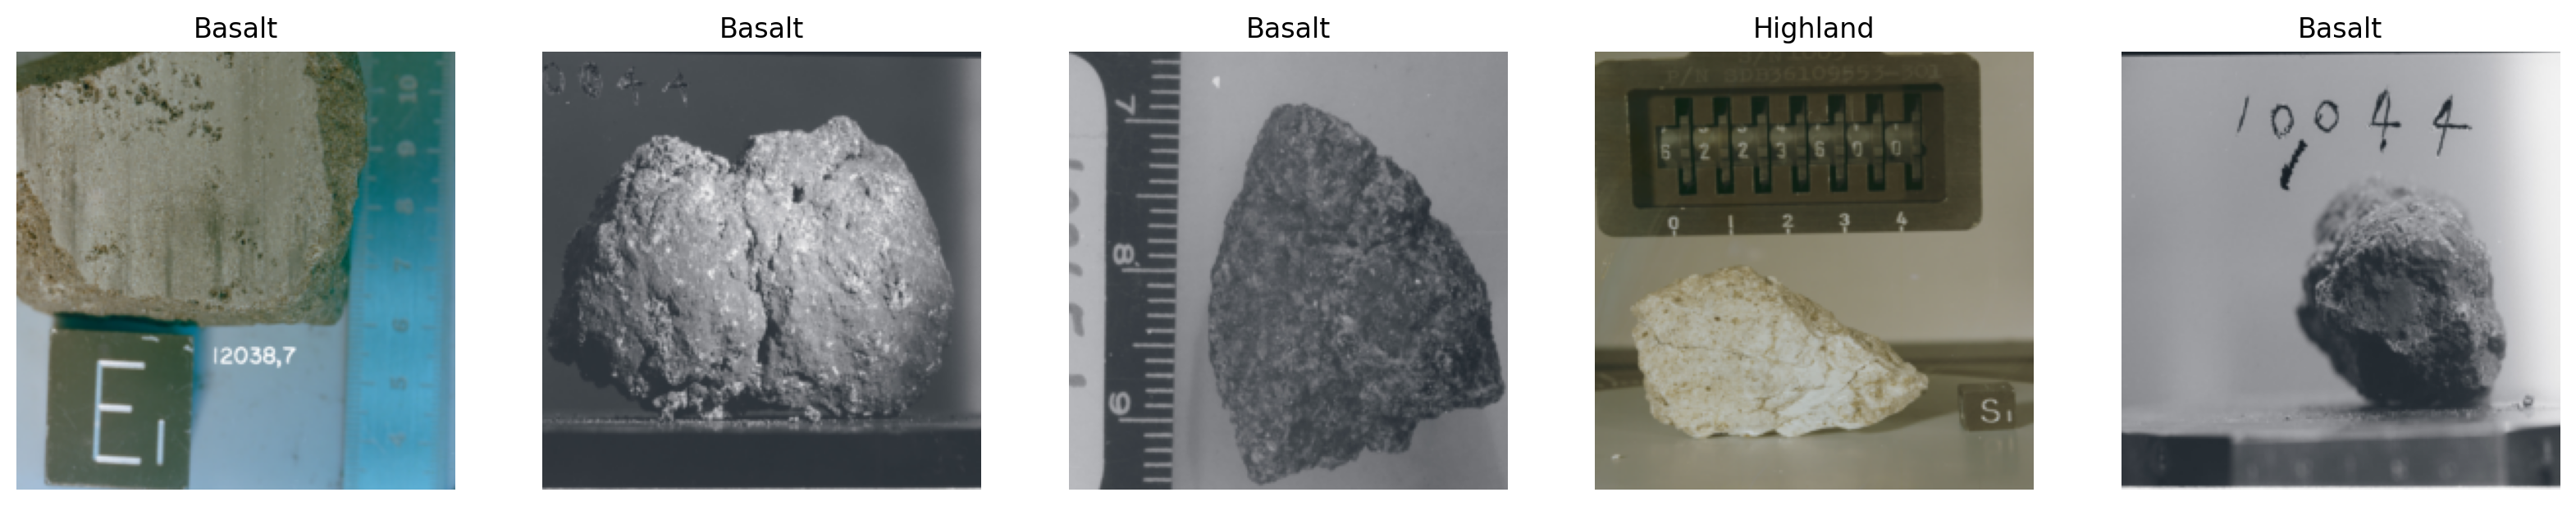

In [27]:
# 5개의 이미지와 레이블을 랜덤하게 가져온다.
images, labels = get_random_images(5)

# 픽셀 배열을 PIL 형식의 이미지로 변환하고 이미지 크기를 지정한다.
to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20, 20))

# 학습 데이터의 class 리스트를 얻는다.
classes = trainloader.dataset.classes

# 이미지를 표시하기 위한 설정을 한다.
for ii in range(len(images)) :
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    index = labels[ii].item()
    
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

# 주피터 노트북에 이미지를 표시한다.
plt.show()

# ResNet50 모델을 가져와 FCL(Fully Connected Layer)을 수정한다.

## Compute device를 정한다(CPU or GPU)

In [51]:
# compute device를 정하고 확인한다.


## 사전학습된 ResNet50 모델을 지정한다.

In [52]:
# resnet50 모델을 pretrained=True로 설정한다.


### (확인) 수정 전의 ResNet50 모델을 확인해 본다. 

## FCL을 수정한다.(뉴런 구축, 신경망 연결, FCL의 layer 설정 등)

In [53]:
# 모든 신경망 구축 : 전이학습을 위해 모델의 가중치를 freeze 한다.
    
# 뉴런들을 연결하여 신경망을 생성한다.


# q: explain the above code
# a: 2048개의 입력을 받아 512개의 출력을 내고, ReLU 함수를 거쳐 0.2의 확률로 Dropout을 적용한다.
# 512개의 입력을 받아 2개의 출력을 내고, LogSoftmax 함수를 거쳐 1차원으로 변환한다.
# 1차원으로 변환된 출력을 갖는 신경망을 생성한다.

# 손실함수를 Cross entropy loss 함수로 지정한다.

# why
# optimizer를 Adam으로 지정한다.
# what is Adam
#

# 신경망을 compute device로 보낸다.

# 종료 여부를 출력한다.



### (확인) FCL을 확인해 본다.

# 모델의 FCL을 학습시키고 테스트 한다.

## 모델 학습/검증을 위한 변수를 설정한다.

In [54]:
# 에폭 및 출력 간격을 설정한다.

# 손실 변수들을 초기화 한다.

# 현재의 학습 단계를 표현하는 steps 변수를 0으로 초기화 한다.



## 설정한 에폭만큼 모델을 학습시키며 검증/평가 한다.

In [55]:
# 설정한 회수만큼 학습 후 테스트 및 평가해 본다.


### (확인) 학습 손실값과 테스트 손실값을 그래프로 확인한다.

In [56]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# in this graph, what is x-axis? y-axis?
# x-axis: epoch
# y-axis: loss

# 학습/테스트 완료된 모델을 저장한다.

In [57]:
# 추후 로드하여 사용할 수 있도록 학습/테스트 완료된 모델을 저장한다.


# 완성된 모델을 사용하여 예측한다.

## 저장한 모델을 불러온다.

In [58]:
# 저장한 모델을 불러온다.


### (확인) 불러온 모델을 확인해 본다.

## 이미지 예측을 위해 predict_image() 함수를 만든다.

## 5개의 이미지를 임의로 가져와 예측해 본다.